# Exploratory Data Analysis (EDA) – Retail Sales Data

## Project Objective
The objective of this project is to analyze retail sales data to identify sales trends,
customer behavior, and product performance using exploratory data analysis techniques.

## Business Questions
- How have sales changed over time?
- Which products and categories generate the highest revenue?
- Who are the most valuable customers?
- Are there seasonal patterns in sales?
- Which product categories perform poorly?


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [30]:
import pandas as pd

df = pd.read_csv("data/superstore.csv")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Data Overview

- Number of records and features
- Data types of columns
- Summary statistics


In [31]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


## Data Cleaning

In this section, missing values, duplicates, and incorrect data types are handled
to prepare the dataset for analysis.


In [32]:
df.isnull().sum()
df.drop_duplicates(inplace=True)


## Univariate Analysis

Analyzing individual variables to understand their distribution and behavior.


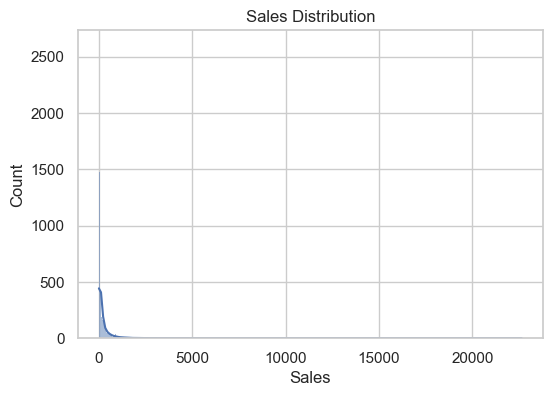

In [33]:
plt.figure(figsize=(6,4))
sns.histplot(df['Sales'], kde=True)
plt.title("Sales Distribution")
plt.show()


## Time Series Analysis

Analyzing sales trends over time to identify growth patterns and seasonality.


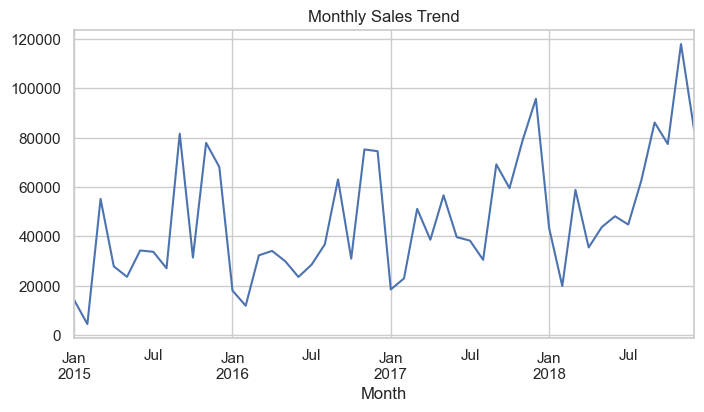

In [34]:
df['Order Date'] = pd.to_datetime(
    df['Order Date'],
    dayfirst=True,
    errors='coerce'
)

df = df.dropna(subset=['Order Date'])

df['Month'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(figsize=(8,4), title="Monthly Sales Trend")
plt.show()


## Key Insights

- Sales show noticeable seasonal trends.
- A small number of products contribute to most revenue.
- Repeat customers generate higher sales.


## Business Recommendations

- Increase inventory before peak seasons.
- Focus marketing on high-performing products.
- Offer loyalty programs to high-value customers.


## Sales Heatmap Analysis

### Purpose
To understand how sales are distributed across different **regions** and **product categories**, a heatmap visualization was used. This helps identify high-performing and underperforming combinations.

### Methodology
A pivot table was created using **total sales** aggregated by **Region** and **Category**. The results were visualized using a heatmap for easy comparison across segments.

### Key Insights
- Certain regions contribute significantly more sales across most categories.
- Some product categories perform consistently well across all regions.
- A few region–category combinations show relatively lower sales, indicating potential areas for targeted marketing or strategic improvement.

### Business Implications
- High-performing region–category pairs can be prioritized for expansion.
- Underperforming combinations may require promotional strategies or operational review.
- Resource allocation can be optimized based on regional demand patterns.

### Conclusion
The heatmap provides a clear overview of sales concentration across regions and categories, enabling data-driven decisions to improve overall business performance.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = df.pivot_table(
    values='Sales',
    index='Region',
    columns='Category',
    aggfunc='sum'
)

plt.figure(figsize=(8,4))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales Heatmap by Region and Category")
plt.show()
